<a href="https://colab.research.google.com/github/ihsanramdhani/skin-cancer-detection/blob/master/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import Dependencies

import os
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
#-----------------------------------------------------------
# Download dataset
# Because we get the data from kaggle, we need kaggle API Token
#-----------------------------------------------------------

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/kaggle API Token/kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign -p /tmp

{"username":"ihsannnn","key":"85fda20b45bb02143b7ae255c5223b5e"}skin-cancer-malignant-vs-benign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
#-----------------------------------------------------------
# Extract the data and save it to /tmp directory
#-----------------------------------------------------------

shutil.unpack_archive("/tmp/skin-cancer-malignant-vs-benign.zip", "/tmp")

In [8]:
#-----------------------------------------------------------
# Check how much the data in each directory
#-----------------------------------------------------------

train_benign_fnames = os.listdir("/tmp/train/benign")
train_malignant_fnames = os.listdir("/tmp/train/malignant")
validation_benign_fnames = os.listdir("/tmp/test/benign")
validation_malignant_fnames = os.listdir("/tmp/test/malignant")

print(len(train_benign_fnames))
print(len(train_malignant_fnames))
print(len(validation_benign_fnames))
print(len(validation_malignant_fnames))

1440
1197
360
300


In [9]:
#-----------------------------------------------------------
# Build the model using convolutional layer
#-----------------------------------------------------------

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["acc"])

In [10]:
# DATA AUGMENTATION

TRAINING_DIR = "/tmp/train"
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=20,
    target_size=(224, 224),
    class_mode='binary'
)

VALIDATION_DIR = "/tmp/test"
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=20,
    target_size=(224, 224),
    class_mode='binary'
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [11]:
# TRAINING

history = model.fit_generator(train_generator,
                              epochs = 100,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
132/132 [==============================] - 66s 254ms/step - loss: 1.2081 - acc: 0.6174 - val_loss: 0.6540 - val_acc: 0.5985
Epoch 2/100
132/132 [==============================] - 33s 253ms/step - loss: 0.5614 - acc: 0.7190 - val_loss: 0.5109 - val_acc: 0.7439
Epoch 3/100
132/132 [==============================] - 33s 252ms/step - loss: 0.5380 - acc: 0.7547 - val_loss: 0.4010 - val_acc: 0.8015
Epoch 4/100
132/132 [==============================] - 33s 251ms/step - loss: 0.5038 - acc: 0.7473 - val_loss: 0.6274 - val_acc: 0.7030
Epoch 5/100
132/132 [==============================] - 33s 251ms/step - loss: 0.5010 - acc: 0.7674 - val_loss: 0.3946 - val_acc: 0.7909
Epoch 6/100
132/132 [==============================] - 33s 253ms/step - loss: 0.4552 - acc: 0.7702 - val_loss: 0.3851 - val_acc: 0.7894
Epoch 7/100
132/132 [==============================] - 33s 251ms/step - loss: 0.4586 - acc: 0.7950 - val_loss: 0.3878 - val_acc: 0.8030
Epoch 8/100
132/132 [===========================

Text(0.5, 1.0, 'Training and validation loss')

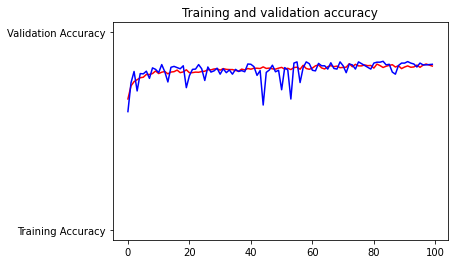

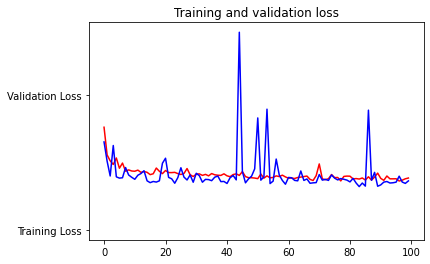

In [12]:
# PLOT LOSS AND ACCURACY

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')